In [1]:
# https://doi.org/10.1103/PhysRevB.102.024440

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numba import jit

In [3]:
#@jit(nopython=True)
def calc_ukvk(Lx,Ly,J):
    rxs = np.arange(Lx)
    rys = np.arange(Ly)
    rs = np.array(np.meshgrid(rxs,rys)).transpose(2,1,0)
    #kxs = np.linspace(-np.pi,np.pi-2.0*np.pi/Lx,Lx)
    kxs = np.linspace(-np.pi+np.pi/Lx,np.pi-2.0*np.pi/Lx+np.pi/Lx,Lx) ## antiperiodic
    #kys = np.linspace(-np.pi,np.pi-2.0*np.pi/Ly,Ly)
    kys = np.linspace(-np.pi+np.pi/Ly,np.pi-2.0*np.pi/Ly+np.pi/Ly,Ly) ## antiperiodic
    ks = np.array(np.meshgrid(kxs,kys)).transpose(2,1,0)
    gamks = 0.5 * np.sum(np.cos(ks),axis=2)
    omgks = 2.0 * J * np.sqrt((1.0-gamks)*(1.0+np.sign(J)*gamks))
    Aks = 2.0 * J * (1.0 - (1.0-np.sign(J)) * 0.5 * gamks)
    uks = np.sqrt(0.5 * (Aks/omgks + 1.0))
    vks = np.sqrt(0.5 * (Aks/omgks - 1.0))
    uk2s = uks * uks
    vk2s = vks * vks
    ukvks = uks * vks
    return rs,uk2s,vk2s,ukvks,ks,omgks

In [4]:
@jit(nopython=True)
def calc_rho(rs,t,uk2s,vk2s,ukvks,ks,omgks,Ns):
    Lx = rs.shape[0]
    Ly = rs.shape[1]
    rho = np.zeros((Lx,Ly),dtype=np.float64)
    rho[:,:] = np.sum(uk2s)*np.sum(vk2s)
    for i in range(Lx):
        for j in range(Ly):
            krs = np.sum(ks*rs[i,j],axis=2)
            tmp0 = np.exp(1j*(krs-omgks*t))
            tmp1 = uk2s * tmp0
            tmp2 = ukvks * tmp0
            rho[i,j] += np.abs(np.sum(tmp1))**2
            rho[i,j] += np.abs(np.sum(tmp2))**2
    rho /= Ns**2
    return rho

In [5]:
@jit(nopython=True)
def calc_rho_subtracted(rs,t,uk2s,vk2s,ukvks,ks,omgks,Ns):
    Lx = rs.shape[0]
    Ly = rs.shape[1]
    rho = np.zeros((Lx,Ly),dtype=np.float64)
#    rho[:,:] = np.sum(uk2s)*np.sum(vk2s)
    for i in range(Lx):
        for j in range(Ly):
            krs = np.sum(ks*rs[i,j],axis=2)
            tmp0 = np.exp(1j*(krs-omgks*t))
            tmp1 = uk2s * tmp0
            tmp2 = ukvks * tmp0
            rho[i,j] += np.abs(np.sum(tmp1))**2
            rho[i,j] += np.abs(np.sum(tmp2))**2
    rho /= Ns**2
    return rho

In [6]:
#L = 20
#L = 100
L = 200
Lx = L
Ly = L
J = -1.0 ## FM
#J = 1.0 ## AF
rs,uk2s,vk2s,ukvks,ks,omgks = calc_ukvk(Lx,Ly,J)

#t = 30.0
t = 43.0
#rhos = calc_rho(rs,t,uk2s,vk2s,ukvks,ks,omgks,Lx*Ly)
rhos = calc_rho_subtracted(rs,t,uk2s,vk2s,ukvks,ks,omgks,Lx*Ly)
print(rhos)

[[3.40108349e-07 8.33369452e-06 2.01527080e-07 ... 8.57654385e-06
  2.01527080e-07 8.33369452e-06]
 [8.33369452e-06 2.04200998e-04 4.93802969e-06 ... 2.10151549e-04
  4.93802969e-06 2.04200998e-04]
 [2.01527080e-07 4.93802969e-06 1.19412429e-07 ... 5.08192711e-06
  1.19412429e-07 4.93802969e-06]
 ...
 [8.57654385e-06 2.10151549e-04 5.08192711e-06 ... 2.16275503e-04
  5.08192711e-06 2.10151549e-04]
 [2.01527080e-07 4.93802969e-06 1.19412429e-07 ... 5.08192711e-06
  1.19412429e-07 4.93802969e-06]
 [8.33369452e-06 2.04200998e-04 4.93802969e-06 ... 2.10151549e-04
  4.93802969e-06 2.04200998e-04]]


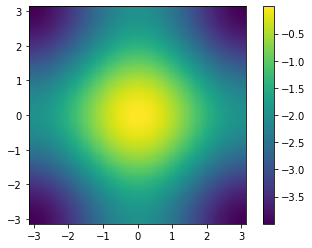

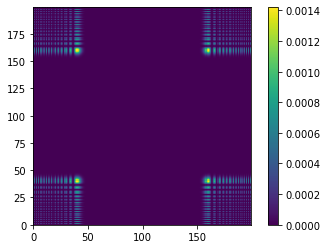

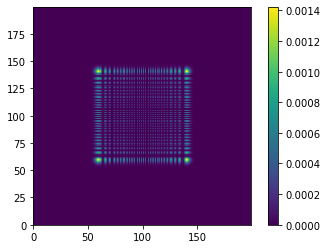

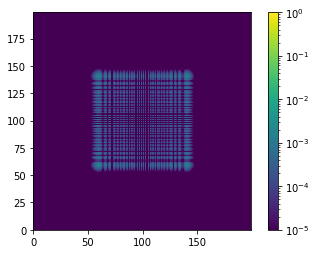

In [7]:
#plt.axis("equal")
plt.gca().set_aspect("equal",adjustable="box") ## https://stackoverflow.com/questions/17990845/how-to-equalize-the-scales-of-x-axis-and-y-axis-in-matplotlib
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
plt.pcolormesh(ks.transpose(2,0,1)[0],ks.transpose(2,0,1)[1],omgks,shading="auto")
plt.colorbar()
plt.show()

#plt.axis("equal")
plt.gca().set_aspect("equal",adjustable="box") ## https://stackoverflow.com/questions/17990845/how-to-equalize-the-scales-of-x-axis-and-y-axis-in-matplotlib
plt.xlim(0,Lx-1)
plt.ylim(0,Ly-1)
plt.pcolormesh(rs.transpose(2,0,1)[0],rs.transpose(2,0,1)[1],rhos,shading="auto")
plt.colorbar()
plt.show()

#plt.axis("equal")
plt.gca().set_aspect("equal",adjustable="box") ## https://stackoverflow.com/questions/17990845/how-to-equalize-the-scales-of-x-axis-and-y-axis-in-matplotlib
plt.xlim(0,Lx-1)
plt.ylim(0,Ly-1)
plt.pcolormesh(rs.transpose(2,0,1)[0],rs.transpose(2,0,1)[1],np.roll(rhos,(Lx//2,Ly//2),axis=(0,1)),shading="auto")
plt.colorbar()
plt.show()

#plt.axis("equal")
plt.gca().set_aspect("equal",adjustable="box") ## https://stackoverflow.com/questions/17990845/how-to-equalize-the-scales-of-x-axis-and-y-axis-in-matplotlib
plt.xlim(0,Lx-1)
plt.ylim(0,Ly-1)
plt.pcolormesh(rs.transpose(2,0,1)[0],rs.transpose(2,0,1)[1],np.roll(rhos,(Lx//2,Ly//2),axis=(0,1)),shading="auto",norm=matplotlib.colors.LogNorm(vmin=1e-5,vmax=1)) ## https://stackoverflow.com/questions/56457672/python-logarithmic-colormap-palette
plt.colorbar()
plt.show()

In [8]:
#L = 20
#L = 100
L = 200
Lx = L
Ly = L
#J = -1.0 ## FM
J = 1.0 ## AF
rs,uk2s,vk2s,ukvks,ks,omgks = calc_ukvk(Lx,Ly,J)

#t = 30.0
t = 43.0
#rhos = calc_rho(rs,t,uk2s,vk2s,ukvks,ks,omgks,Lx*Ly)
rhos = calc_rho_subtracted(rs,t,uk2s,vk2s,ukvks,ks,omgks,Lx*Ly)
print(rhos)

[[5.60211826e-02 3.69489647e-30 1.36306420e-03 ... 4.26266357e-25
  1.36306420e-03 1.67667907e-29]
 [4.35882012e-30 1.73379556e-02 4.29159550e-30 ... 1.24777310e-03
  4.26067916e-25 1.73379556e-02]
 [1.36306420e-03 4.17889815e-30 9.09072921e-03 ... 2.12895873e-24
  9.09072921e-03 4.26224299e-25]
 ...
 [4.26272227e-25 1.24777310e-03 2.12895180e-24 ... 6.43274400e-03
  8.63914045e-30 1.24777310e-03]
 [1.36306420e-03 4.26082668e-25 9.09072921e-03 ... 8.06284897e-30
  9.09072921e-03 1.27707565e-29]
 [1.58527426e-29 1.73379556e-02 4.26218984e-25 ... 1.24777310e-03
  1.20774277e-29 1.73379556e-02]]


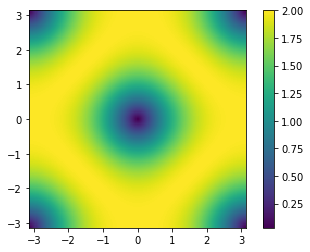

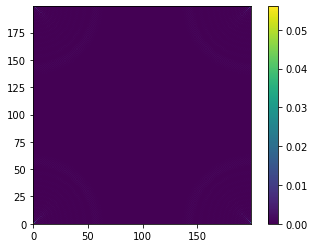

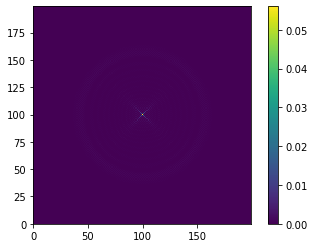

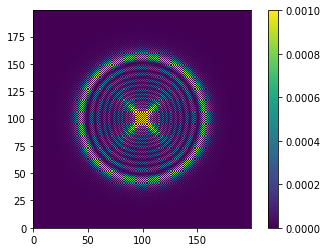

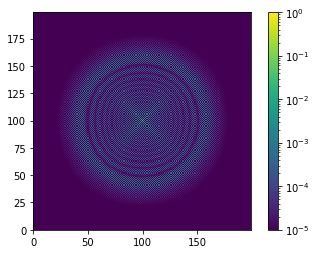

In [9]:
#plt.axis("equal")
plt.gca().set_aspect("equal",adjustable="box") ## https://stackoverflow.com/questions/17990845/how-to-equalize-the-scales-of-x-axis-and-y-axis-in-matplotlib
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
plt.pcolormesh(ks.transpose(2,0,1)[0],ks.transpose(2,0,1)[1],omgks,shading="auto")
plt.colorbar()
plt.show()

#plt.axis("equal")
plt.gca().set_aspect("equal",adjustable="box") ## https://stackoverflow.com/questions/17990845/how-to-equalize-the-scales-of-x-axis-and-y-axis-in-matplotlib
plt.xlim(0,Lx-1)
plt.ylim(0,Ly-1)
plt.pcolormesh(rs.transpose(2,0,1)[0],rs.transpose(2,0,1)[1],rhos,shading="auto")
plt.colorbar()
plt.show()

#plt.axis("equal")
plt.gca().set_aspect("equal",adjustable="box") ## https://stackoverflow.com/questions/17990845/how-to-equalize-the-scales-of-x-axis-and-y-axis-in-matplotlib
plt.xlim(0,Lx-1)
plt.ylim(0,Ly-1)
plt.pcolormesh(rs.transpose(2,0,1)[0],rs.transpose(2,0,1)[1],np.roll(rhos,(Lx//2,Ly//2),axis=(0,1)),shading="auto")
plt.colorbar()
plt.show()

#plt.axis("equal")
plt.gca().set_aspect("equal",adjustable="box") ## https://stackoverflow.com/questions/17990845/how-to-equalize-the-scales-of-x-axis-and-y-axis-in-matplotlib
plt.xlim(0,Lx-1)
plt.ylim(0,Ly-1)
plt.pcolormesh(rs.transpose(2,0,1)[0],rs.transpose(2,0,1)[1],np.roll(rhos,(Lx//2,Ly//2),axis=(0,1)),shading="auto",vmax=0.001)
plt.colorbar()
plt.show()

#plt.axis("equal")
plt.gca().set_aspect("equal",adjustable="box") ## https://stackoverflow.com/questions/17990845/how-to-equalize-the-scales-of-x-axis-and-y-axis-in-matplotlib
plt.xlim(0,Lx-1)
plt.ylim(0,Ly-1)
plt.pcolormesh(rs.transpose(2,0,1)[0],rs.transpose(2,0,1)[1],np.roll(rhos,(Lx//2,Ly//2),axis=(0,1)),shading="auto",norm=matplotlib.colors.LogNorm(vmin=1e-5,vmax=1)) ## https://stackoverflow.com/questions/56457672/python-logarithmic-colormap-palette
plt.colorbar()
plt.show()